# Custom Portfolio out of Nifty50

## importing necessary libraries

In [1]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

## Getting nifty 50 components

In [2]:
stocks = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50#Constituents')[2]
stocks['Symbol'] = stocks['Symbol'] + '.NS'
stock_symbols = stocks['Symbol'].tolist()


## Creating the benchmark index

In [4]:
def benchmark():
  stocks = yf.download(stock_symbols,interval='1d',start='2019-01-01',end='2024-01-01',)['Adj Close']
  mtly = (stocks+1).resample('BM').last()
  mtly = mtly.transpose()
  diction = {}
  for i in mtly:
    summed = np.sum(mtly[i])
    diction[i] = summed
  return diction

## Implementing CurrPrice function

In [6]:
def CurPrice(curDate):
  stock_data = yf.download(stock_symbols,start = curDate,interval='1d')
  data = stock_data[stock_data.index == curDate]['Close']
  return data

## Implementing NdayRet function



In [20]:
def NdayRet(N,currDate):
  start = pd.to_datetime(currDate) - pd.DateOffset(N+1)
  start = start.strftime("%Y-%m-%d")
  end = pd.to_datetime(currDate)+ pd.DateOffset(days=1)
  end = end.strftime('%Y-%m-%d')

  stocks = yf.download(stock_symbols,interval='1d',start=start,end=end)['Adj Close']
  day_1 = stocks.iloc[0,:].values
  day_n = stocks.iloc[-1,:].values
  returns = (day_n/day_1) - 1
  return returns



## Implementing DailyRet FUnction

In [10]:
def DailyRet(currDate):
  start = pd.to_datetime(currDate) - pd.DateOffset(days=1)
  start = start.strftime('%Y-%m-%d')
  end = pd.to_datetime(currDate) + pd.DateOffset(days=1)
  end = end.strftime('%Y-%m-%d')
  stocks = yf.download(stock_symbols,interval='1d',start=start,end=end)['Adj Close']
  yesterday = stocks.iloc[0,:].values
  today = stocks.iloc[-1,:].values
  returns = (today/yesterday)-1
  if stocks[stocks.index==currDate].empty == False:
    return returns
  else:
    return None


## Implementing Last30daysPrice function

In [11]:
def Last30daysPrice(currDate):
  start = pd.to_datetime(currDate) - pd.DateOffset(31)
  start = start.strftime("%Y-%m-%d")
  end = pd.to_datetime(currDate) + pd.DateOffset(days=1)
  end = end.strftime('%Y-%m-%d')
  stocks = yf.download(stock_symbols,interval='1d',start=start,end=end)['Adj Close']

  if stocks[stocks.index==currDate].empty == False:
    return stocks
  else:
    return None

## Implementing teh momentum strategy function

In [12]:
def momentum_strategy(stock_symbols,start_date,end_date):
  portfolio = pd.DataFrame(index=pd.date_range(start = start_date,end = end_date,freq='BM'))
  port_return = pd.DataFrame(index=pd.date_range(start = start_date,end = end_date,freq='BM'))
  for symb in stock_symbols:
    stock_data = yf.download(symb,interval='1d',start=start_date,end=end_date)
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()
    new_stock_data = stock_data[stock_data['Returns']>0]
    positive_returns = stock_data.resample('BM').last()['Returns']>0
    new_stock_data = new_stock_data.resample('BM').last()
    positive_stocks = new_stock_data['Adj Close']
    portfolio[symb] = positive_returns.astype('int')
    port_return[symb] = positive_stocks
  return portfolio,port_return

In [13]:
df1,df2 = momentum_strategy(stock_symbols,'2019-01-01','2023-12-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

## Getting the total summed up monthly value for custom strategy

In [14]:
dictionary = {}
for i in df2.index:
  summed = np.sum(df2.loc[df2.index == i].fillna(0,axis=1).values)
  dictionary[i] = summed


## Plotting the line graph for monthly returns based on input equity

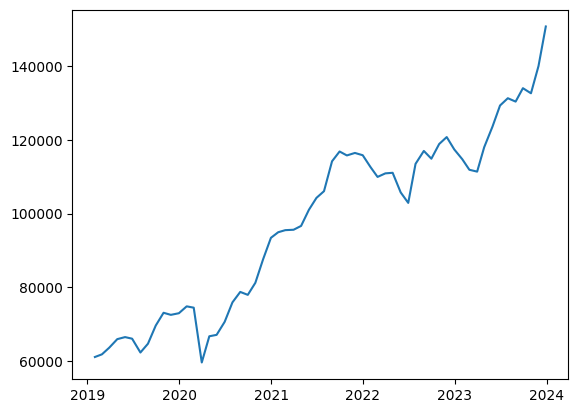

In [17]:
eq = {}
equity = 0
for i in list(dictionary.keys()):

  eq[i] =equity+dictionary[i]

plt.plot(eq.keys(),eq.values());

## Calculating summed monthly returns for all stocks in Nifty50 index

In [18]:
new_df = df1.transpose()
empt = {}
for i in new_df.columns:
  x = new_df[i]
  empt[i] = x[x.index == 1]

## Calcuating The top stocks which are usually selected

In [19]:
top_stocks = {}

for i in df1 :
  for j in df1[i]:
    if j == 1:
      if i in top_stocks:
        top_stocks[i] += 1
      else:
        top_stocks[i] = 1
list(map(lambda x:x[0],sorted(top_stocks.items(),key=lambda x:x[1],reverse=True)))[0:5]

['TATAMOTORS.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'BPCL.NS']

## Plotting the graph of Custom portfolio return Vs. Actual market(NIfty50)

[*********************100%%**********************]  50 of 50 completed


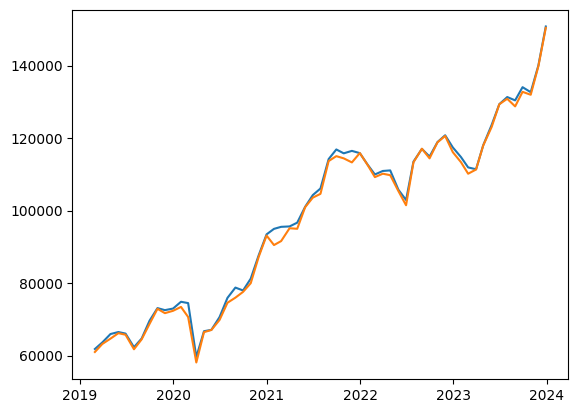

In [22]:
benchmark_dict = benchmark()
years = [i.year for i in dictionary.keys()]
plt.plot(list(dictionary.keys())[1:],list(dictionary.values())[1:]);
plt.plot(list(benchmark_dict.keys())[1:],list(benchmark_dict.values())[1:]);



## Calculating CAGR ratio

In [23]:
no_of_years = df2.index.year.nunique()
begin = df2.iloc[1]
final = df2.iloc[-1]
np.mean((((final/begin)**(1/int(no_of_years)))-1)*100)

21.433507851666146